In [1]:
import base64
from base64 import b64encode

import glob
import io

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import gymnasium as gym
import random
import sys

from IPython.display import HTML
from IPython import display
from IPython.display import clear_output

from gym.wrappers.record_video import RecordVideo
from gym_minigrid.wrappers import *
from gym import spaces
from gym_minigrid.minigrid import OBJECT_TO_IDX, COLOR_TO_IDX


plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%matplotlib inline
%reload_ext autoreload
# %autoreload 2

pygame 2.5.2 (SDL 2.28.3, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


/usr/local/lib/python3.9/site-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


Action: 5
Observation: {'image': array([[[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [8, 1, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]]], dtype=uint8), 'directi

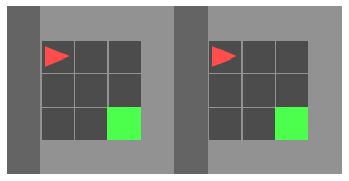

In [2]:
env = gym.make('MiniGrid-Empty-5x5-v0', render_mode="rgb_array")
env.reset()
before_img = env.render()
plt.imshow(before_img);
action = env.actions.forward
action = env.action_space.sample()
obs, reward, terminated, truncated, info  = env.step(action)

# Print information about the step
print("Action:", action)
print("Observation:", obs)
print("Reward:", reward)
print("Terminated:", terminated)
print("truncated:", truncated)
print("Info:", info)
# Render the environment on the screen
# Note: This method may not work in a headless environment or Jupyter notebook without additional setup
after_img = env.render()

plt.imshow(np.concatenate([before_img, after_img], 1));
plt.axis('off')
plt.show()


In [3]:
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [4]:
class FlatObsWrapper(gym.core.ObservationWrapper):
    """Fully observable gridworld returning a flat grid encoding."""

    def __init__(self, env, max_env_steps=50):
        super().__init__(env)

        # Since the outer walls are always present, we remove left, right, top, bottom walls
        # from the observation space of the agent. There are 3 channels, but for simplicity
        # in this assignment, we will deal with flattened version of state.
        
        self.observation_space = spaces.Box(
            low=0,
            high=255,
            shape=((self.env.width-2) * (self.env.height-2) * 3,),  # number of cells
            dtype='uint8'
        )
#         self.unwrapped.max_steps = max_env_steps

    def observation(self, obs):
        # this method is called in the step() function to get the observation
        # we provide code that gets the grid state and places the agent in it
        env = self.unwrapped
        full_grid = env.grid.encode()
        full_grid[env.agent_pos[0]][env.agent_pos[1]] = np.array([
            OBJECT_TO_IDX['agent'],
            COLOR_TO_IDX['red'],
            env.agent_dir
        ])
        full_grid = full_grid[1:-1, 1:-1]   # remove outer walls of the environment (for efficiency)
        
        flattened_grid = full_grid.ravel()
        return flattened_grid
    
    def render(self, *args, **kwargs):
        """This removes the default visualization of the partially observable field of view."""
        return self.unwrapped.render(*args, **kwargs)

Observation: [10  0  1  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  8  1  0] , Observation Shape:  (108,)
Reward: 0
terminated: False
truncated: False
info {}
Image shape: (256, 256, 3)


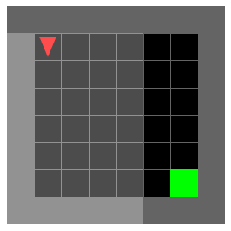

In [5]:
# Convert MiniGrid Environment with Flat Observable
env = FlatObsWrapper(gym.make('MiniGrid-Empty-8x8-v0', render_mode="rgb_array"), max_env_steps = 200)

# Reset the environment
env.reset()

# Select the action right
action = env.actions.right

# Take a step in the environment and store it in appropriate variables
obs, reward, terminated, truncated, info  = env.step(action)


# Render the current state of the environment
img = env.render()
################# YOUR CODE ENDS HERE ###############################

print('Observation:', obs, ', Observation Shape: ', obs.shape)
print('Reward:', reward)
print('terminated:', terminated)
print('truncated:', truncated)
print('info', info)
print('Image shape:', img.shape)
plt.imshow(img);
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [6]:
# Monitor is a gym wrapper, which helps easy rendering of videos of the wrapped environment.
def wrap_env(env):
    # env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
    # env = RecordVideo(env, './video', video_length=500, name_prefix="snippet")
    env = RecordVideo(env, './video', episode_trigger = lambda episode_number: True, video_length=0, name_prefix="full_episode")
    return env

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def gen_wrapped_env(env_name):
    return wrap_env(FlatObsWrapper(gym.make(env_name,render_mode="rgb_array"), max_env_steps=200))

In [7]:
# Random agent - we only use it in this cell for demonstration
class RandPolicy:
    def __init__(self, action_space):
        self.action_space = action_space
        
    def act(self, *unused_args):
        return self.action_space.sample()

In [8]:
# This function plots videos of rollouts (episodes) of a given policy and environment
def log_policy_rollout(policy, env_name):
    # Create environment with flat observation
    env = gen_wrapped_env(env_name)
    obs, reward, terminated, truncated, info = [], -1, False, False, {}
    # Initialize environment
    observation = env.reset()
    actions = [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2]
    terminated = False
    episode_reward = 0
    episode_length = 0
#     i = 0
    # Run until done == True
#     while not terminated:
    for i in range(len(actions)):
    
        # Take a step
        action = policy.act(observation)
        # obs, reward, terminated, truncated, info = env.step(action)
        obs, reward, terminated, truncated, info = env.step(actions[i])
        print(i)
        episode_reward += reward
        episode_length += 1
        if i == len(actions):
             show_video()
             return obs, reward, terminated, truncated, info
            

    print('Total reward:', episode_reward)
    print('Total length:', episode_length)

#     env.close()
    show_video()
    return obs, reward, terminated, truncated, info
    
# Test that the logging function is working
test_env_name = 'MiniGrid-Empty-8x8-v0'
rand_policy = RandPolicy(FlatObsWrapper(gym.make(test_env_name)).action_space)

obs, reward, terminated, truncated, info = log_policy_rollout(rand_policy, test_env_name)
print(obs, reward, terminated, truncated, info)

0
1
2
3
4
5
6
7
8
9
10
Moviepy - Building video /Users/victor/Documents/python-projects/medium-py/minigrid-world-envs/video/full_episode-episode-0.mp4.
Moviepy - Writing video /Users/victor/Documents/python-projects/medium-py/minigrid-world-envs/video/full_episode-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/victor/Documents/python-projects/medium-py/minigrid-world-envs/video/full_episode-episode-0.mp4
11
Total reward: 0.9578125
Total length: 12


[ 1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0 10  0  0] 0.9578125 True False {}


https://minigrid.farama.org/environments/minigrid/BlockedUnlockPickupEnv/
https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-08-06-03-Policy-Gradient-With-Gym-MiniGrid.ipynb#scrollTo=Nz2O5Rmr97z0


        """Run one timestep of the environment's dynamics using the agent actions.

        When the end of an episode is reached (``terminated or truncated``), it is necessary to call :meth:`reset` to
        reset this environment's state for the next episode.

        .. versionchanged:: 0.26

            The Step API was changed removing ``done`` in favor of ``terminated`` and ``truncated`` to make it clearer
            to users when the environment had terminated or truncated which is critical for reinforcement learning
            bootstrapping algorithms.

        Args:
            action (ActType): an action provided by the agent to update the environment state.

        Returns:
            observation (ObsType): An element of the environment's :attr:`observation_space` as the next observation due to the agent actions.
                An example is a numpy array containing the positions and velocities of the pole in CartPole.
            reward (SupportsFloat): The reward as a result of taking the action.
            terminated (bool): Whether the agent reaches the terminal state (as defined under the MDP of the task)
                which can be positive or negative. An example is reaching the goal state or moving into the lava from
                the Sutton and Barton, Gridworld. If true, the user needs to call :meth:`reset`.
            truncated (bool): Whether the truncation condition outside the scope of the MDP is satisfied.
                Typically, this is a timelimit, but could also be used to indicate an agent physically going out of bounds.
                Can be used to end the episode prematurely before a terminal state is reached.
                If true, the user needs to call :meth:`reset`.
            info (dict): Contains auxiliary diagnostic information (helpful for debugging, learning, and logging).
                This might, for instance, contain: metrics that describe the agent's performance state, variables that are
                hidden from observations, or individual reward terms that are combined to produce the total reward.
                In OpenAI Gym <v26, it contains "TimeLimit.truncated" to distinguish truncation and termination,
                however this is deprecated in favour of returning terminated and truncated variables.
            done (bool): (Deprecated) A boolean value for if the episode has ended, in which case further :meth:`step` calls will
                return undefined results. This was removed in OpenAI Gym v26 in favor of terminated and truncated attributes.
                A done signal may be emitted for different reasons: Maybe the task underlying the environment was solved successfully,
                a certain timelimit was exceeded, or the physics simulation has entered an invalid state.
        """